## Titanic - Machine Learning from Disaster
This is my first kaggle competition, for learning more about machine learning

### 1. Loading Data
In this first step I import de libraries needed

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read csv datasets


In [2]:
train = pd.read_csv('./Sources/train.csv')
test = pd.read_csv('./Sources/test.csv')
gender_submission = pd.read_csv('./Sources/gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. Data Exploration

In [4]:
# What columns does it have?
print('Columns: ',train.columns.values)

# What size does it have?
print('Size: ', train.size)

# Do you have some null value?
train.info()

Columns:  ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Size:  10692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# How numeric variables are distributed?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# How categorical variables are distributed?
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


### 2.1 EDA: Study of the target variable

In [7]:
train.groupby('Survived').count()['PassengerId']

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [8]:
# target vs sex
train.groupby(['Survived','Sex']).count()['PassengerId']

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: PassengerId, dtype: int64


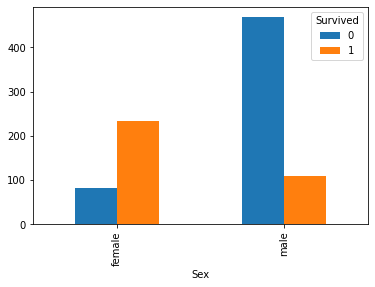

In [9]:
grouped_sex = train.groupby(['Survived','Sex']).count()['PassengerId']
print(grouped_sex)
(grouped_sex.unstack(level=0)).plot.bar()
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


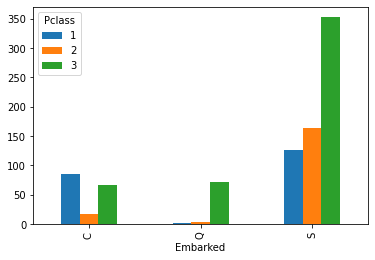

In [10]:
# embarked vs pclass
print(train.groupby(['Pclass', 'Embarked'])
        .count()['PassengerId']
        .unstack(level=0)
        .plot.bar())

### 3. Data Processing

I work with next variables:
- Survived
- Sex
- Age
- Pclass

In [11]:
train[['Survived', 'Sex', 'Age', 'Pclass']].head(3)

,Survived,Sex,Age,Pclass
0,0,male,22.0,3
1,1,female,38.0,1
2,1,female,26.0,3


In [12]:
# Do you have some null value?
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB


I need improving:
- I have null data in column 'Age', train['Age'].isna()
- I have type object in column 'Sex' and I need an int or float for the Algorithm

In [13]:
# Show null distribution in Age
(train[train['Age'].isna()]
        .groupby(['Sex', 'Pclass'])
        .count()['PassengerId']
        .unstack(level=0))

Sex,female,male
Pclass,,
1,9,21
2,2,9
3,42,94


In [14]:
(train[train['Age'].isna()]
        .groupby(['SibSp', 'Parch'])
        .count()['PassengerId']
        .unstack(level=0))

SibSp,0,1,2,3,8
Parch,,,,,
0,133.0,21.0,3.0,NaN,NaN
1,1.0,3.0,NaN,4.0,NaN
2,3.0,2.0,NaN,NaN,7.0


With the information above we can see what people, who don't register your their age, are travel alone

This gives us an idea for creation a variable for the passenger travel alone or not.

In [15]:
# Calculate the age median
age_median = train['Age'].median()
age_median

28.0

In [16]:
# Inpute value to fill null
train['Age'] = train['Age'].fillna(age_median)
train[['Survived', 'Sex', 'Age', 'Pclass']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   Pclass    891 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 28.0+ KB



We no longer have null data.

Now I map 'Sex' to int

In [17]:
# map for level encoding
train['Sex'] = train['Sex'].map({ 'female': 1, 'male': 0}).astype(int)
train[['Survived', 'Sex', 'Age', 'Pclass']].head()

,Survived,Sex,Age,Pclass
0,0,0,22.0,3
1,1,1,38.0,1
2,1,1,26.0,3
3,1,1,35.0,1
4,0,0,35.0,3


### 3.1 Create new variable

In [18]:
train['TravelAlone'] = np.where((train['SibSp'] == 0) & (train['Parch'] == 0), 1, 0)
train[['Survived', 'Sex', 'Age', 'Pclass', 'TravelAlone']].head()

,Survived,Sex,Age,Pclass,TravelAlone
0,0,0,22.0,3,0
1,1,1,38.0,1,0
2,1,1,26.0,3,1
3,1,1,35.0,1,0
4,0,0,35.0,3,1


Survived  TravelAlone
0         0              175
          1              374
1         0              179
          1              163
Name: PassengerId, dtype: int64


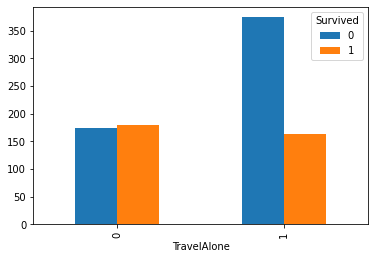

In [19]:
grouped_travel_alone = train.groupby(['Survived', 'TravelAlone']).count()['PassengerId']
print(grouped_travel_alone)
(grouped_travel_alone.unstack(level=0).plot.bar())
plt.show()

In [20]:
# Variable dependent
Y_train = train['Survived']

#Variable independent
features = ['Sex', 'Age', 'Pclass', 'TravelAlone']
X_train = train[features]

print(Y_train.shape, X_train.shape)

(891,) (891, 4)


### 4. Models

I try two machine learning models:
- Logistic regression
- decision tree

In [21]:
# Train logistic regression model
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

LogisticRegression()

In [22]:
# Train decision tree model
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier()

### 5. Evaluacion
confusion matrix to evaluate each model

In [23]:
from sklearn.metrics import plot_confusion_matrix

def confusion_matrix_accuracy(modelo):
    disp = plot_confusion_matrix(modelo, X_train, Y_train, cmap=plt.cm.Blues, values_format='d')
    true_prediction = disp.confusion_matrix[0,0] + disp.confusion_matrix[1,1]
    total_data = np.sum(disp.confusion_matrix)
    accuracy = true_prediction / total_data
    print('Accuracy: ', np.round(accuracy, 2))
    plt.show()

Accuracy:  0.79


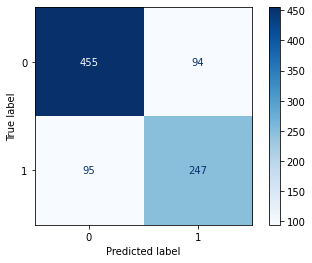

In [24]:
confusion_matrix_accuracy(logistic_regression)

Accuracy:  0.89


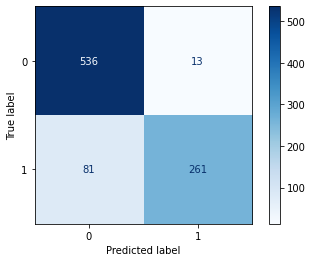

In [25]:
confusion_matrix_accuracy(decision_tree)

### 5.1 Evaluacion sobre test set
Last evaluation is not correctly because evaluate with the train set. However kaggle realize a test in your page, for this reason now i prepare the test set.

In [26]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
# Prepare the test set

# map sex to int
test['Sex'] = test['Sex'].map({ 'female': 1, 'male': 0 }).astype(int)

# Complete nulls in Age
test['Age'] = test['Age'].fillna(age_median)

# Create column TrevelAlone
test['TravelAlone'] = np.where((test['SibSp'] == 0) & (test['Parch'] == 0), 1, 0)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  TravelAlone  418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [30]:
test[features].head()

,Sex,Age,Pclass,TravelAlone
0,0,34.5,3,1
1,1,47.0,3,0
2,0,62.0,2,1
3,0,27.0,3,1
4,1,22.0,3,0


In [31]:
X_test = test[features]
X_test.shape

(418, 4)

In [32]:
Y_predicted_logreg = logistic_regression.predict(X_test)
Y_predicted_detree = decision_tree.predict(X_test)

### 6. Prediction

In [33]:
print(Y_predicted_logreg[0:20])
print(Y_predicted_detree[0:20])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
[0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0]


In [34]:
# Export to csv
def export_csv(y_pred, name):
    output = pd.DataFrame({ 'PassengerId': test.PassengerId, 'Survived': y_pred})
    output.to_csv(name, index=False)

In [35]:
export_csv(Y_predicted_logreg, './Predictions/ema_logistic_regression.csv')

In [36]:
export_csv(Y_predicted_detree, './Predictions/ema_desicion_tree.csv')

### Logistic Regression Kaggle Score
![Picture title](image-20210928-202742.png)
### Decision Tree Kaggle Score
![Picture title](image-20210928-202810.png)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=78ef8acf-0010-4fa8-a1e4-74c95c2f92c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>